In [1]:
from PIL import Image

for i in range(1, 6):
    img = Image.open("IMAGE/0"+str(i)+".png")
    width, height = img.size
    print("Image size: {}x{}".format(width, height))


Image size: 2828x2663
Image size: 2828x2663
Image size: 2828x2663
Image size: 2828x2663
Image size: 2828x2663


In [2]:
import os
import torch
from ultralytics import YOLO

In [3]:
import glob
import cv2

# loading a custom model
model = YOLO('new_yolov8_best.pt')

In [4]:
import os


file_path = 'IMAGE/01.png'
if os.path.exists(file_path):
    print(f"File '{file_path}' exists!")
else:
    print(f"File '{file_path}' does not exist.")

File 'IMAGE/01.png' exists!


In [5]:
results = model(file_path)  # predict on an image


image 1/1 c:\Users\timmy\Downloads\weed_detect\IMAGE\01.png: 608x640 20 Weeds, 520.0ms
Speed: 9.5ms preprocess, 520.0ms inference, 2636.7ms postprocess per image at shape (1, 3, 608, 640)


In [6]:
# Define paths
path_to_test_dataset = 'IMAGE/'
path_to_store_bounding_boxes = 'detect/'


In [7]:


# Ensure the output directories exist
os.makedirs(path_to_store_bounding_boxes, exist_ok=True)

# List to hold all detections for saving to a single JSON file
all_detections = []

# Mapping of class labels to readable names (assuming 'weeds' is class 1)
class_names = ["citrus area", "trees", "weeds", "weeds and trees"]

for image_path in glob.glob(path_to_test_dataset + "*.png"):
    image = cv2.imread(image_path)
    imagename_withoutextension = os.path.splitext(os.path.basename(image_path))[0]
    results = model.predict(image_path, imgsz=640, conf=0.25, iou=0.45)
    results = results[0]  

    detections = []

    for box in results.boxes:
        tensor = box.xyxy[0]
        x1 = int(tensor[0].item())
        y1 = int(tensor[1].item())
        x2 = int(tensor[2].item())
        y2 = int(tensor[3].item())
        conf = box.conf[0].item()  # Confidence score
        label = box.cls[0].item()  # Class label

        # Only process if the detected class is "weeds"
        if class_names[int(label)] == "weeds":
            # Draw bounding box on the image
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 255), 3)   

            # Append the detection result to the list
            detections.append({
                "label": "weeds",
                "confidence": conf,
                "bbox": [x1, y1, x2, y2]
            })

    # Save the image with bounding boxes
    cv2.imwrite(os.path.join(path_to_store_bounding_boxes, imagename_withoutextension + ".png"), image)

    # Append detections for this image to the all_detections list
    if detections:
        all_detections.append({
            "image": imagename_withoutextension + ".png",
            "detections": detections
        })


image 1/1 c:\Users\timmy\Downloads\weed_detect\IMAGE\01.png: 608x640 18 Weeds, 621.1ms
Speed: 0.0ms preprocess, 621.1ms inference, 6.6ms postprocess per image at shape (1, 3, 608, 640)

image 1/1 c:\Users\timmy\Downloads\weed_detect\IMAGE\02.png: 608x640 1 Tree, 13 Weeds, 578.3ms
Speed: 0.0ms preprocess, 578.3ms inference, 0.0ms postprocess per image at shape (1, 3, 608, 640)

image 1/1 c:\Users\timmy\Downloads\weed_detect\IMAGE\03.png: 608x640 1 Citrus Area, 22 Weeds, 1332.6ms
Speed: 2.3ms preprocess, 1332.6ms inference, 15.0ms postprocess per image at shape (1, 3, 608, 640)

image 1/1 c:\Users\timmy\Downloads\weed_detect\IMAGE\04.png: 608x640 1 Tree, 2 Weeds, 608.0ms
Speed: 0.0ms preprocess, 608.0ms inference, 4.2ms postprocess per image at shape (1, 3, 608, 640)

image 1/1 c:\Users\timmy\Downloads\weed_detect\IMAGE\05.png: 608x640 1 Citrus Area, 5 Weeds, 949.5ms
Speed: 31.2ms preprocess, 949.5ms inference, 12.1ms postprocess per image at shape (1, 3, 608, 640)


In [8]:
import shapefile
from shapely.geometry import Polygon
from pyproj import Proj, transform
import geopandas as gpd
import matplotlib.pyplot as plt

In [9]:
image_coords = [
    (-48.8865020, -20.5889181),  # top left
    (-48.8855890, -20.5889069),  # top right
    (-48.8855771, -20.5897666),  # bottom left
    (-48.8864901, -20.5897778)   # bottom right
]

image_coords_2 = [
    (-48.8864783, -20.5906375),  # top left
    (-48.8855653, -20.5906264),  # top right
    (-48.8855534, -20.5914861),  # bottom left
    (-48.8864664, -20.5914973)   # bottom right
]

image_coords_3 = [
    (-48.8864664, -20.5914973),  # top left
    (-48.8855534, -20.5914861),  # top right
    (-48.8855415, -20.5923458),  # bottom left
    (-48.8864546, -20.5923570)   # bottom right
]

image_coords_4 = [
    (-48.8846285, -20.5923347),  # top left
    (-48.8837155, -20.5923235),  # top right
    (-48.8837036, -20.5931832),  # bottom left
    (-48.8846167, -20.5931944)   # bottom right
]

image_coords_5 = [
    (-48.8855297, -20.5932056),  # top left
    (-48.8846167, -20.5931944),  # top right
    (-48.8846048, -20.5940541),  # bottom left
    (-48.8855178, -20.5940653)   # bottom right
]

In [10]:
import os
import cv2
import shapefile
import numpy as np
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

# Define paths
path_to_test_dataset = 'IMAGE/'
path_to_store_bounding_boxes = 'detect/'
path_to_save_shapefile = 'weed_detections_.shp'

# Ensure the output directories exist
os.makedirs(path_to_store_bounding_boxes, exist_ok=True)

# Mapping of class labels to readable names (assuming 'weeds' is class 1)
class_names = ["citrus area", "trees", "weeds", "weeds and trees" ]

# Function to convert pixel coordinates to geographical coordinates
def convert_pixel_to_latlon(x, y, image_width, image_height, image_coords):
    top_left, top_right, bottom_right, bottom_left = image_coords
    
    lon_top = top_left[0] + (top_right[0] - top_left[0]) * (x / image_width)
    lon_bottom = bottom_left[0] + (bottom_right[0] - bottom_left[0]) * (x / image_width)
    lat_left = top_left[1] + (bottom_left[1] - top_left[1]) * (y / image_height)
    lat_right = top_right[1] + (bottom_right[1] - top_right[1]) * (y / image_height)
    
    lon = lon_top + (lon_bottom - lon_top) * (y / image_height)
    lat = lat_left + (lat_right - lat_left) * (x / image_width)
    
    return lon, lat

# Function to create a shapefile with image dimensions and bounding boxes
def create_shapefile_with_latlon(bboxes, image_shape, image_coords, shapefile_path):
    w = shapefile.Writer(shapefile_path)
    w.field('id', 'C')

    img_width, img_height = image_shape

    # Add bounding boxes for weeds
    for idx, (x1, y1, x2, y2) in enumerate(bboxes):
        top_left = convert_pixel_to_latlon(x1, y1, img_width, img_height, image_coords)
        top_right = convert_pixel_to_latlon(x2, y1, img_width, img_height, image_coords)
        bottom_left = convert_pixel_to_latlon(x1, y2, img_width, img_height, image_coords)
        bottom_right = convert_pixel_to_latlon(x2, y2, img_width, img_height, image_coords)

        poly = Polygon([top_left, top_right, bottom_right, bottom_left, top_left])
        w.poly([poly.exterior.coords])
        w.record(f'weed_{idx}')

    w.close()

# Load the image
image_path = 'slices/slice_37.png'  # Replace with your actual image path
image = cv2.imread(image_path)
image_height, image_width, _ = image.shape
imagename_withoutextension = os.path.splitext(os.path.basename(image_path))[0]

# Perform model prediction
results = model.predict(image_path, imgsz=640, conf=0.2, iou=0.4)
results = results[0]

weed_bboxes = []

for i, box in enumerate(results.boxes):
    tensor = box.xyxy[0]
    x1 = int(tensor[0].item())
    y1 = int(tensor[1].item())
    x2 = int(tensor[2].item())
    y2 = int(tensor[3].item())
    conf = box.conf[0].item()  # Confidence score
    label = box.cls[0].item()  # Class label

    # Debugging output to ensure boxes are detected
    print(f"Box {i}: ({x1}, {y1}), ({x2}, {y2}), label: {label}, confidence: {conf}")

    # Only process if the detected class is "weeds"
    if class_names[int(label)] == "weeds":
        print("weed detected")
        # Draw bounding box on the image
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 255), 3)
        # Save the bounding box coordinates
        weed_bboxes.append((x1, y1, x2, y2))

# Save the image with bounding boxes
cv2.imwrite(os.path.join(path_to_store_bounding_boxes, imagename_withoutextension + ".png"), image)

# Create the shapefile with bounding boxes converted to lat/lon
create_shapefile_with_latlon(weed_bboxes, (image_width, image_height), image_coords_3, path_to_save_shapefile)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Image with Weed Bounding Boxes")
plt.axis('on')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'slices/slice_37.png'

In [ ]:
# shp_file = gpd.read_file('weed_detections.shp')

DriverError: weed_detections.shp: No such file or directory

In [ ]:
# shp_file

,id,geometry
0,weed_0,"POLYGON ((-48.88597 -20.59109, -48.88593 -20.5..."
1,weed_1,"POLYGON ((-48.88647 -20.59106, -48.88642 -20.5..."
2,weed_2,"POLYGON ((-48.88613 -20.59080, -48.88610 -20.5..."
3,weed_3,"POLYGON ((-48.88620 -20.59088, -48.88617 -20.5..."
4,weed_4,"POLYGON ((-48.88599 -20.59078, -48.88594 -20.5..."
5,weed_5,"POLYGON ((-48.88603 -20.59086, -48.88594 -20.5..."
6,weed_6,"POLYGON ((-48.88597 -20.59133, -48.88594 -20.5..."
7,weed_7,"POLYGON ((-48.88597 -20.59141, -48.88594 -20.5..."
8,weed_8,"POLYGON ((-48.88612 -20.59120, -48.88607 -20.5..."
9,weed_9,"POLYGON ((-48.88606 -20.59079, -48.88602 -20.5..."


<Axes: >

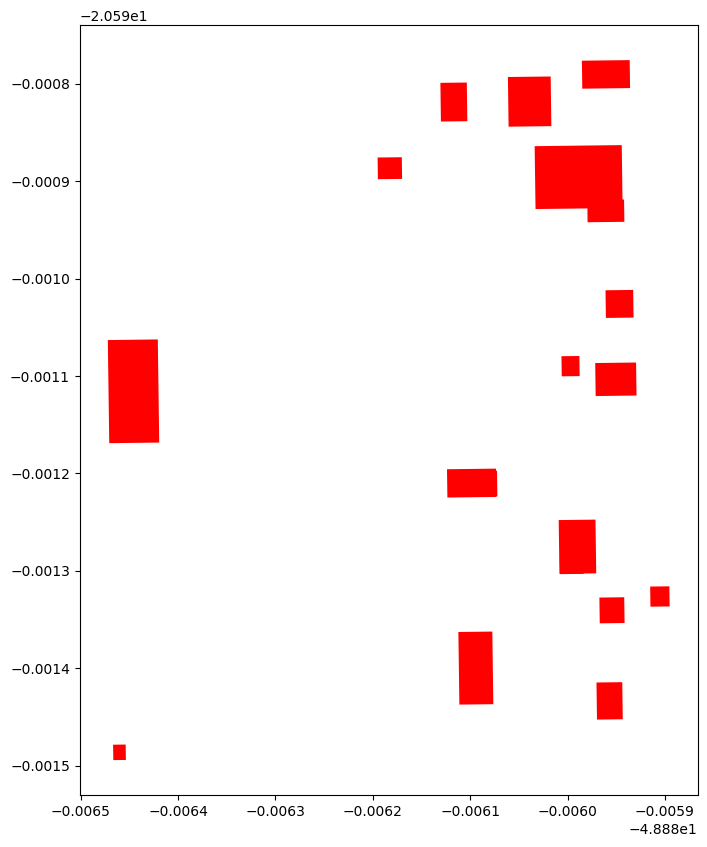

In [ ]:
# shp_file.plot(figsize=(10, 10), color='red')

## Making reuseable functions


In [ ]:
import os
import cv2
import zipfile
import shapefile
import numpy as np
import streamlit as st
from io import BytesIO
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from PIL import Image

# Define paths
path_to_store_bounding_boxes = 'detect/'
path_to_save_shapefile = 'weed_detections.shp'

# Ensure the output directories exist
os.makedirs(path_to_store_bounding_boxes, exist_ok=True)

# Mapping of class labels to readable names (assuming 'weeds' is class 1)
class_names = ["citrus area", "trees", "weeds", "weeds and trees" ]

# Function to convert pixel coordinates to geographical coordinates
def convert_pixel_to_latlon(x, y, image_width, image_height, image_coords):
    top_left, top_right, bottom_right, bottom_left = image_coords
    
    lon_top = top_left[0] + (top_right[0] - top_left[0]) * (x / image_width)
    lon_bottom = bottom_left[0] + (bottom_right[0] - bottom_left[0]) * (x / image_width)
    lat_left = top_left[1] + (bottom_left[1] - top_left[1]) * (y / image_height)
    lat_right = top_right[1] + (bottom_right[1] - top_right[1]) * (y / image_height)
    
    lon = lon_top + (lon_bottom - lon_top) * (y / image_height)
    lat = lat_left + (lat_right - lat_left) * (x / image_width)
    
    return lon, lat

# Function to create a shapefile with image dimensions and bounding boxes
def create_shapefile_with_latlon(bboxes, image_shape, image_coords, shapefile_path):
    w = shapefile.Writer(shapefile_path)
    w.field('id', 'C')

    img_width, img_height = image_shape

    # Add bounding boxes for weeds
    for idx, (x1, y1, x2, y2) in enumerate(bboxes):
        top_left = convert_pixel_to_latlon(x1, y1, img_width, img_height, image_coords)
        top_right = convert_pixel_to_latlon(x2, y1, img_width, img_height, image_coords)
        bottom_left = convert_pixel_to_latlon(x1, y2, img_width, img_height, image_coords)
        bottom_right = convert_pixel_to_latlon(x2, y2, img_width, img_height, image_coords)

        poly = Polygon([top_left, top_right, bottom_right, bottom_left, top_left])
        w.poly([poly.exterior.coords])
        w.record(f'weed_{idx}')

    w.close()

# Streamlit UI
st.title("Weed Detection and Shapefile Creation")

# Input coordinates for image corners
st.sidebar.header("Image Coordinates")
top_left = st.sidebar.text_input("Top Left (lon, lat)", value="-48.8859, -20.5909")
top_right = st.sidebar.text_input("Top Right (lon, lat)", value="-48.8869, -20.5909")
bottom_right = st.sidebar.text_input("Bottom Right (lon, lat)", value="-48.8869, -20.5900")
bottom_left = st.sidebar.text_input("Bottom Left (lon, lat)", value="-48.8859, -20.5900")

# Convert input coordinates to tuples
image_coords = [
    tuple(map(float, top_left.split(','))),
    tuple(map(float, top_right.split(','))),
    tuple(map(float, bottom_right.split(','))),
    tuple(map(float, bottom_left.split(',')))
]

# Upload image
uploaded_image = st.file_uploader("Upload an image", type=["png", "jpg", "jpeg"])

if uploaded_image is not None:
    # Display uploaded image
    st.image(uploaded_image, caption="Uploaded Image", use_column_width=True)
    img = Image.open(uploaded_image)
    img_array = np.array(img)
    image_height, image_width, _ = img_array.shape

    # Perform weed detection on button click
    if st.button("Detect Weeds"):
        # Perform model prediction
        results = model.predict(uploaded_image, imgsz=640, conf=0.2, iou=0.4)
        results = results[0]

        weed_bboxes = []

        for i, box in enumerate(results.boxes):
            tensor = box.xyxy[0]
            x1 = int(tensor[0].item())
            y1 = int(tensor[1].item())
            x2 = int(tensor[2].item())
            y2 = int(tensor[3].item())
            conf = box.conf[0].item()  # Confidence score
            label = box.cls[0].item()  # Class label

            # Debugging output to ensure boxes are detected
            print(f"Box {i}: ({x1}, {y1}), ({x2}, {y2}), label: {label}, confidence: {conf}")

            # Only process if the detected class is "weeds"
            if class_names[int(label)] == "weeds":
                print("weed detected")
                # Draw bounding box on the image
                cv2.rectangle(img_array, (x1, y1), (x2, y2), (255, 0, 255), 3)
                # Save the bounding box coordinates
                weed_bboxes.append((x1, y1, x2, y2))

        # Save the image with bounding boxes
        detected_image_path = os.path.join(path_to_store_bounding_boxes, "detected_image.png")
        cv2.imwrite(detected_image_path, cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR))

        # Display the image with bounding boxes
        st.image(img_array, caption="Detected Weeds", use_column_width=True)

        # Create shapefile on button click
        if st.button("Create Shapefile"):
            create_shapefile_with_latlon(weed_bboxes, (image_width, image_height), image_coords, path_to_save_shapefile)

            # Display shapefile plot
            fig, ax = plt.subplots()
            sf = shapefile.Reader(path_to_save_shapefile)
            for shape in sf.shapes():
                poly = Polygon(shape.points)
                x, y = poly.exterior.xy
                ax.plot(x, y)
            plt.show()
            st.pyplot(fig)

            # Create ZIP file of the shapefile components
            zip_buffer = BytesIO()
            with zipfile.ZipFile(zip_buffer, 'w') as zip_file:
                for filename in ['weed_detections.shp', 'weed_detections.shx', 'weed_detections.dbf']:
                    zip_file.write(filename, os.path.basename(filename))
            zip_buffer.seek(0)

            # Download ZIP file
            st.download_button(
                label="Download Shapefile ZIP",
                data=zip_buffer,
                file_name="weed_detections.zip",
                mime="application/zip"
            )


## Creating a splitting function to split images.


In [4]:
import os
import math
import json
import cv2
import numpy as np
from PIL import Image

In [32]:
# Increase the limit for PIL's decompression bomb protection
Image.MAX_IMAGE_PIXELS = None

def calculate_new_coordinates(original_coords, start_x, start_y, end_x, end_y, img_width, img_height):
    # Calculate the step size for the coordinates
    lon_step = (original_coords[1][0] - original_coords[0][0]) / img_width
    lat_step = (original_coords[0][1] - original_coords[3][1]) / img_height

    # Calculate new coordinates for the cut image
    new_top_left = (original_coords[0][0] + start_x * lon_step, original_coords[0][1] - start_y * lat_step)
    new_top_right = (original_coords[0][0] + end_x * lon_step, original_coords[0][1] - start_y * lat_step)
    new_bottom_right = (original_coords[0][0] + end_x * lon_step, original_coords[0][1] - end_y * lat_step)
    new_bottom_left = (original_coords[0][0] + start_x * lon_step, original_coords[0][1] - end_y * lat_step)

    return [new_top_left, new_top_right, new_bottom_right, new_bottom_left]

In [33]:
def slice_image_and_coordinates(image_path, original_coords, slice_width=3000, slice_height=3000, output_folder='slices'):
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Load the image
    img = Image.open(image_path)
    img_array = np.array(img)
    img_height, img_width, _ = img_array.shape

    slice_coords = {}
    slice_id = 0

    # Calculate number of slices needed
    num_slices_x = math.ceil(img_width / slice_width)
    num_slices_y = math.ceil(img_height / slice_height)

    for i in range(num_slices_y):
        for j in range(num_slices_x):
            # Calculate the coordinates of the current slice
            start_x = j * slice_width
            end_x = min(start_x + slice_width, img_width)
            start_y = i * slice_height
            end_y = min(start_y + slice_height, img_height)

            # Cut the image
            cut_img = img_array[start_y:end_y, start_x:end_x]
            cut_img_pil = Image.fromarray(cut_img)

            # Save the cut image
            slice_filename = f'slice_{slice_id}.png'
            cut_img_pil.save(os.path.join(output_folder, slice_filename))

            # Calculate new coordinates for the cut image
            new_coords = calculate_new_coordinates(original_coords, start_x, start_y, end_x, end_y, img_width, img_height)
            slice_coords[slice_filename] = new_coords

            slice_id += 1

    # Save coordinates to JSON file
    with open(os.path.join(output_folder, 'coordinates.json'), 'w') as json_file:
        json.dump(slice_coords, json_file, indent=4)

    print(f'Images and coordinates saved to {output_folder}')

In [34]:
# Usage

image_path = 'clip_01.png'
original_coords = [
    (-48.8877415, -20.585013),  # Top left (lon, lat)
    (-48.8819718, -20.585013),  # Top right (lon, lat)
    (-48.8819718, -20.5968754),  # Bottom right (lon, lat)
    (-48.8877415, -20.5968754)   # Bottom left (lon, lat)
]

slice_image_and_coordinates(image_path, original_coords)


Images and coordinates saved to slices


In [35]:
# Function to convert pixel coordinates to geographical coordinates
def convert_pixel_to_latlon(x, y, image_width, image_height, image_coords):
    top_left, top_right, bottom_right, bottom_left = image_coords

    lon_top = top_left[0] + (top_right[0] - top_left[0]) * (x / image_width)
    lon_bottom = bottom_left[0] + (bottom_right[0] - bottom_left[0]) * (x / image_width)
    lat_left = top_left[1] + (bottom_left[1] - top_left[1]) * (y / image_height)
    lat_right = top_right[1] + (bottom_right[1] - top_right[1]) * (y / image_height)

    lon = lon_top + (lon_bottom - lon_top) * (y / image_height)
    lat = lat_left + (lat_right - lat_left) * (x / image_width)

    return lon, lat

# Function to create a shapefile with image dimensions and bounding boxes
def create_shapefile_with_latlon(bboxes, image_shape, image_coords, shapefile_path):
    w = shapefile.Writer(shapefile_path)
    w.field('id', 'C')

    img_width, img_height = image_shape

    for idx, (x1, y1, x2, y2) in enumerate(bboxes):
        top_left = convert_pixel_to_latlon(x1, y1, img_width, img_height, image_coords)
        top_right = convert_pixel_to_latlon(x2, y1, img_width, img_height, image_coords)
        bottom_left = convert_pixel_to_latlon(x1, y2, img_width, img_height, image_coords)
        bottom_right = convert_pixel_to_latlon(x2, y2, img_width, img_height, image_coords)

        poly = Polygon([top_left, top_right, bottom_right, bottom_left, top_left])
        w.poly([poly.exterior.coords])
        w.record(f'weed_{idx}')

    w.close()

In [36]:


# Initialize the model
model = YOLO('new_yolov8_best.pt')

# Load coordinates
with open('slices/coordinates.json') as f:
    slice_coords = json.load(f)

# Detect weeds in each slice
all_weed_bboxes = []

for slice_filename, coords in slice_coords.items():
    slice_path = os.path.join('slices', slice_filename)
    image = cv2.imread(slice_path)
    image_height, image_width, _ = image.shape

    results = model.predict(slice_path, imgsz=640, conf=0.2, iou=0.4)
    results = results[0]

    weed_bboxes = []

    for i, box in enumerate(results.boxes):
        tensor = box.xyxy[0]
        x1 = int(tensor[0].item())
        y1 = int(tensor[1].item())
        x2 = int(tensor[2].item())
        y2 = int(tensor[3].item())
        conf = box.conf[0].item()
        label = box.cls[0].item()

        if class_names[int(label)] == "weeds":
            weed_bboxes.append((x1, y1, x2, y2))

    if weed_bboxes:
        create_shapefile_with_latlon(weed_bboxes, (image_width, image_height), coords, f'shapes/{slice_filename.replace(".png", ".shp")}')
        all_weed_bboxes.extend(weed_bboxes)

# Merge all individual shapefiles into a single shapefile
final_shapefile_path = 'weed_detections_final.shp'
w = shapefile.Writer(final_shapefile_path)
w.field('id', 'C')

for slice_filename, coords in slice_coords.items():
    shape_path = os.path.join('shapes', slice_filename.replace('.png', '.shp'))
    if os.path.exists(shape_path):
        r = shapefile.Reader(shape_path)
        for shape_rec in r.iterShapeRecords():
            w.shape(shape_rec.shape)
            w.record(shape_rec.record[0])

w.close()

print(f'Final shapefile with all weed detections saved to {final_shapefile_path}')



image 1/1 c:\Users\timmy\Downloads\weed_detect\slices\slice_0.png: 640x640 (no detections), 580.5ms
Speed: 29.8ms preprocess, 580.5ms inference, 20.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\timmy\Downloads\weed_detect\slices\slice_1.png: 640x640 2 Weeds, 514.0ms
Speed: 10.9ms preprocess, 514.0ms inference, 15.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\timmy\Downloads\weed_detect\slices\slice_2.png: 640x640 (no detections), 539.9ms
Speed: 8.2ms preprocess, 539.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\timmy\Downloads\weed_detect\slices\slice_3.png: 640x640 4 Trees, 3 Weeds, 537.8ms
Speed: 13.1ms preprocess, 537.8ms inference, 15.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\timmy\Downloads\weed_detect\slices\slice_4.png: 640x640 (no detections), 546.2ms
Speed: 6.0ms preprocess, 546.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

image

In [37]:
# load the shapefile
shp_file = gpd.read_file('weed_detections_final.shp')

In [38]:
shp_file

,id,geometry
0,weed_0,"POLYGON ((-48.88641 -20.58595, -48.88636 -20.5..."
1,weed_1,"POLYGON ((-48.88621 -20.58525, -48.88619 -20.5..."
2,weed_0,"POLYGON ((-48.88472 -20.58568, -48.88460 -20.5..."
3,weed_1,"POLYGON ((-48.88478 -20.58579, -48.88468 -20.5..."
4,weed_2,"POLYGON ((-48.88435 -20.58593, -48.88433 -20.5..."
...,...,...
161,weed_7,"POLYGON ((-48.88307 -20.59600, -48.88304 -20.5..."
162,weed_8,"POLYGON ((-48.88296 -20.59583, -48.88292 -20.5..."
163,weed_9,"POLYGON ((-48.88290 -20.59591, -48.88286 -20.5..."
164,weed_0,"POLYGON ((-48.88265 -20.59661, -48.88261 -20.5..."


<Axes: >

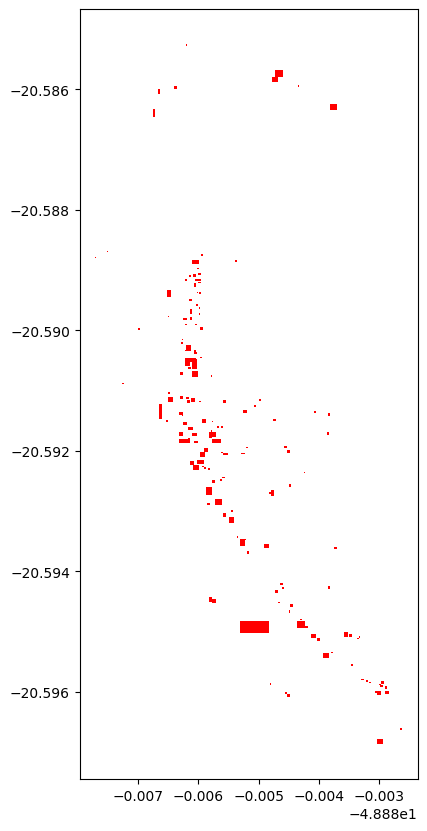

In [39]:
# plotting the shapefile
shp_file.plot(figsize=(10, 10), color='red')

### Considering working with Tiff files


In [12]:
# !pip install rasterio

In [1]:
import rasterio
from rasterio.plot import show
from rasterio.windows import Window

In [2]:
# Open the GeoTIFF file
file_path = "ortho_01.tif"
dataset = rasterio.open(file_path)

# Display some basic information
print(f"CRS: {dataset.crs}")
print(f"Bounds: {dataset.bounds}")
print(f"Width, Height: {dataset.width}, {dataset.height}")

# Read the image data
image_data = dataset.read(1)  # Read the first band

CRS: EPSG:4326
Bounds: BoundingBox(left=-48.887888947, bottom=-20.596966358, right=-48.881627091, top=-20.584845867)
Width, Height: 19148, 37063


In [3]:
image_data.shape

(37063, 19148)

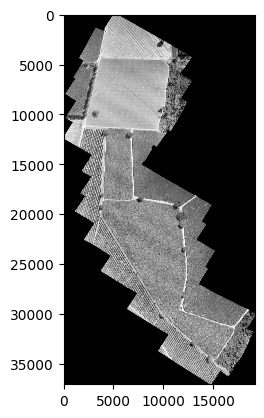

<Axes: >

In [4]:
# Show the image
show(image_data, cmap='gray')

In [20]:
# Get the affine transform (maps pixel coordinates to geographic coordinates)
transform = dataset.transform

# Convert pixel coordinates to geographic coordinates
def pixel_to_geographic(x, y, transform):
    lon, lat = transform * (x, y)
    return lon, lat

# Example conversion
x_pixel, y_pixel = 100, 500
lon, lat = pixel_to_geographic(x_pixel, y_pixel, transform)
print(f"Geographic Coordinates: {lon}, {lat}")


Geographic Coordinates: -48.887856244597664, -20.585009379006582


In [9]:
import os
import cv2
import shapefile
import numpy as np
from shapely.geometry import Polygon
from PIL import Image
import rasterio
from rasterio.windows import Window
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Define paths
path_to_store_bounding_boxes = 'detect/'
path_to_save_shapefile = 'weed_detections.shp'
slice_size = 3000

# Ensure the output directories exist
os.makedirs(path_to_store_bounding_boxes, exist_ok=True)
os.makedirs("slices", exist_ok=True)

# Load YOLO model (update the path to your model)
model = YOLO('new_yolov8_best.pt')

class_names = ["citrus area", "trees", "weeds", "weeds and trees"]

# Function to slice the GeoTIFF
def slice_geotiff(file_path, slice_size=3000):
    slices = []
    with rasterio.open(file_path) as dataset:
        img_width = dataset.width
        img_height = dataset.height
        transform = dataset.transform

        for i in range(0, img_height, slice_size):
            for j in range(0, img_width, slice_size):
                window = Window(j, i, slice_size, slice_size)
                transform_window = rasterio.windows.transform(window, transform)
                slice_data = dataset.read(window=window)
                slice_img = Image.fromarray(slice_data.transpose(1, 2, 0))  # Convert to HWC format
                slice_filename = f"slices/slice_{i}_{j}.png"
                slice_img.save(slice_filename)
                slices.append((slice_filename, transform_window))
    return slices

# Function to create a shapefile with image dimensions and bounding boxes
def create_shapefile_with_latlon(bboxes, shapefile_path="weed_detections.shp"):
    w = shapefile.Writer(shapefile_path)
    w.field('id', 'C')
    
    for idx, (x1, y1, x2, y2, transform) in enumerate(bboxes):
        top_left = rasterio.transform.xy(transform, y1, x1, offset='center')
        top_right = rasterio.transform.xy(transform, y1, x2, offset='center')
        bottom_left = rasterio.transform.xy(transform, y2, x1, offset='center')
        bottom_right = rasterio.transform.xy(transform, y2, x2, offset='center')

        poly = Polygon([top_left, top_right, bottom_right, bottom_left, top_left])
        w.poly([poly.exterior.coords])
        w.record(f'weed_{idx}')
    
    w.close()

# Function to detect weeds in image slices
def detect_weeds_in_slices(slices):
    weed_bboxes = []
    img_width, img_height = 3000, 3000  # Assuming fixed slice size

    for slice_filename, transform in slices:
        img_array = np.array(Image.open(slice_filename))
        results = model.predict(slice_filename, imgsz=640, conf=0.2, iou=0.4)
        results = results[0]
        
        for i, box in enumerate(results.boxes):
            tensor = box.xyxy[0]
            x1 = int(tensor[0].item())
            y1 = int(tensor[1].item())
            x2 = int(tensor[2].item())
            y2 = int(tensor[3].item())
            conf = box.conf[0].item()
            label = box.cls[0].item()

            if class_names[int(label)] == "weeds":
                cv2.rectangle(img_array, (x1, y1), (x2, y2), (255, 0, 255), 3)
                weed_bboxes.append((x1, y1, x2, y2, transform))
        
        # Save the image with bounding boxes
        detected_image_path = os.path.join(path_to_store_bounding_boxes, os.path.basename(slice_filename))
        cv2.imwrite(detected_image_path, cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR))

    create_shapefile_with_latlon(weed_bboxes)



image 1/1 c:\Users\timmy\Downloads\weed_detect\slices\slice_0_0.png: 640x640 2 Trees, 24 Weeds, 505.0ms
Speed: 17.3ms preprocess, 505.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\timmy\Downloads\weed_detect\slices\slice_0_3000.png: 640x640 6 Weeds, 422.6ms
Speed: 8.5ms preprocess, 422.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\timmy\Downloads\weed_detect\slices\slice_0_6000.png: 640x288 1 Weed, 326.4ms
Speed: 6.5ms preprocess, 326.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 288)

image 1/1 c:\Users\timmy\Downloads\weed_detect\slices\slice_3000_0.png: 640x640 9 Weeds, 450.5ms
Speed: 12.5ms preprocess, 450.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\timmy\Downloads\weed_detect\slices\slice_3000_3000.png: 640x640 5 Weeds, 434.1ms
Speed: 8.5ms preprocess, 434.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/

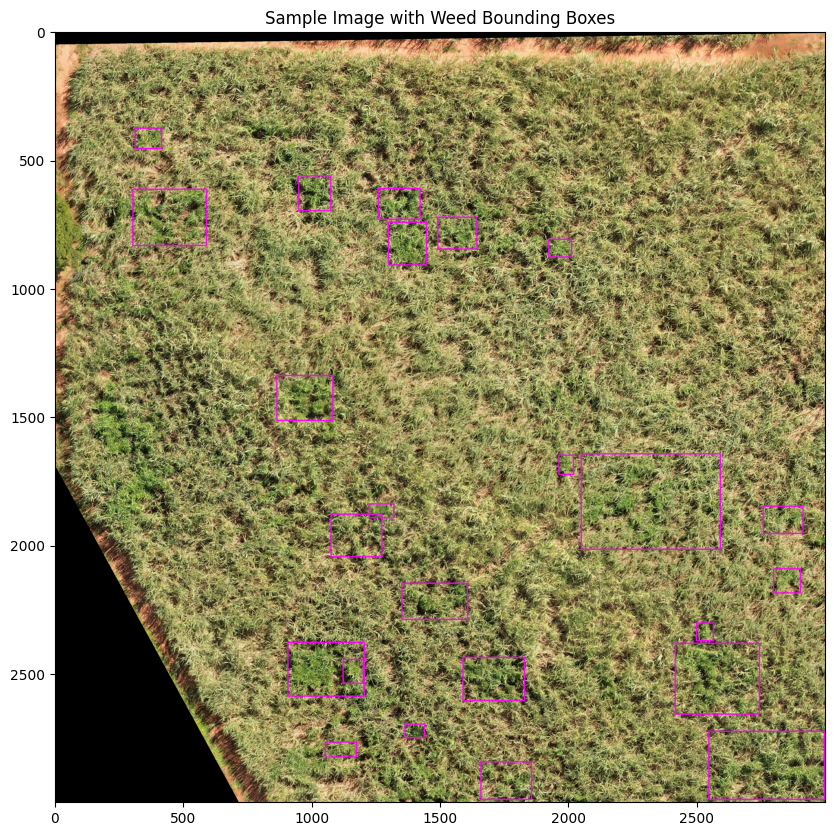

In [10]:
# Main script to process GeoTIFF and detect weeds
geo_tiff_path = 'clip.tif'  # Replace with your GeoTIFF file path

# Slice GeoTIFF
slices = slice_geotiff(geo_tiff_path, slice_size)

# Detect weeds in slices
detect_weeds_in_slices(slices)

print("Weed detection complete. Shapefile generated at:", path_to_save_shapefile)

# Display one of the detected images with bounding boxes (optional)
sample_image_path = os.path.join(path_to_store_bounding_boxes, os.path.basename(slices[0][0]))
sample_image = cv2.imread(sample_image_path)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
plt.title("Sample Image with Weed Bounding Boxes")
plt.axis('on')
plt.show()

In [9]:
import geopandas as gpd

# testing the shapefile
shp_file = gpd.read_file('weed_detections.shp')

In [10]:
shp_file

,id,geometry


C:\Users\timmy\AppData\Local\Temp\ipykernel_15408\1094149751.py:2: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  shp_file.plot(figsize=(10, 10), color='blue')


<Axes: >

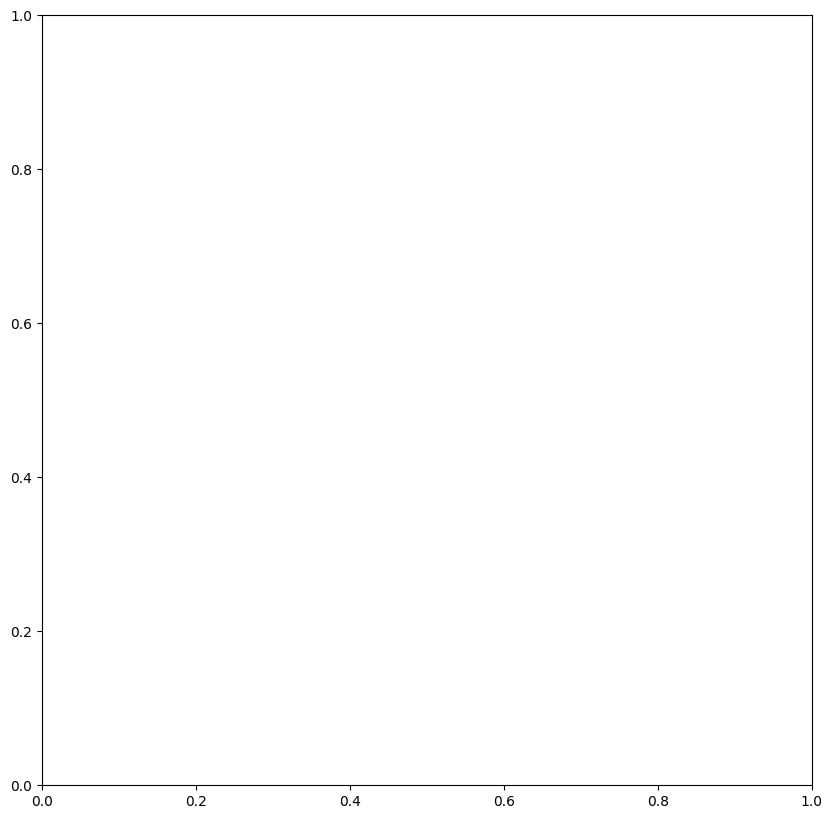

In [11]:
# plotting the shapefile
shp_file.plot(figsize=(10, 10), color='blue')

In [2]:
import pkg_resources

packages = [
    'fastapi',
    'uvicorn',
    'Pillow',
    'opencv-python-headless',
    'ultralytics',
    'shapely',
    'pyshp',
    'jinja2',
    'supabase',
    'python-dotenv'
]

for package in packages:
    try:
        version = pkg_resources.get_distribution(package).version
        print(f"{package}: {version}")
    except pkg_resources.DistributionNotFound:
        print(f"{package}: not installed")


C:\Users\timmy\AppData\Local\Temp\ipykernel_23540\3715667409.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


fastapi: 0.111.0
uvicorn: 0.30.1
Pillow: 10.3.0
opencv-python-headless: 4.10.0.82
ultralytics: 8.2.23
shapely: 2.0.4
pyshp: 2.3.1
jinja2: 3.1.4
supabase: 2.5.3
python-dotenv: 1.0.1
